# Day 3
stock price prediction using RNN

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
!pip install keras
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
prices = pd.read_csv("G:\\Step_internship\\STEP_INTERNSHIP\\FB-stock-prices.csv")

In [5]:
prices.head()

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [6]:
prices.dtypes

Date     object
Price     int64
dtype: object

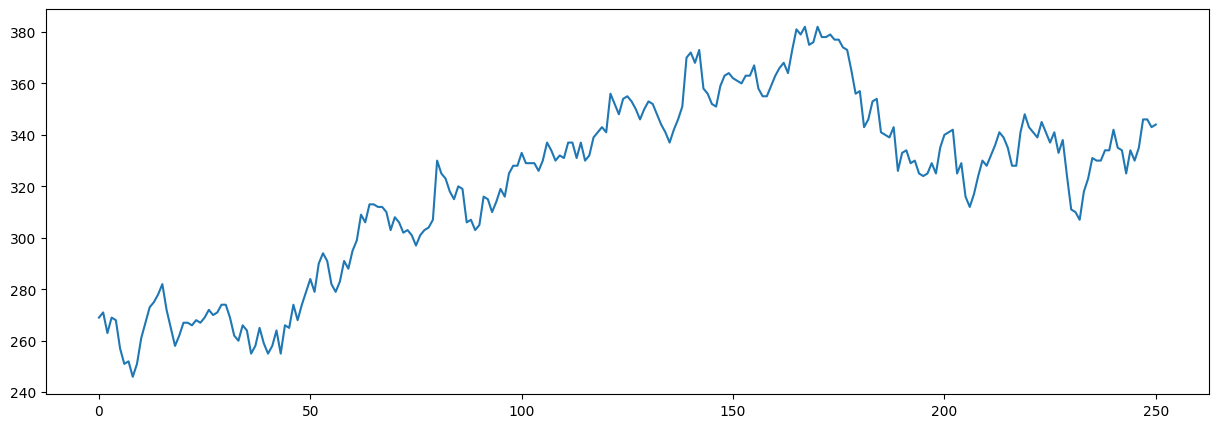

In [7]:
plt.figure(figsize=(15,5))
plt.plot(prices['Price'])
plt.show()

In [8]:
prices.count()

Date     251
Price    251
dtype: int64

In [9]:
from sklearn.preprocessing import minmax_scale,StandardScaler
scaler = StandardScaler()
scaled_prices = scaler.fit_transform(prices[["Price"]].values)

In [10]:
print(scaled_prices)

[[-1.49673154]
 [-1.4393189 ]
 [-1.66896946]
 [-1.49673154]
 [-1.52543786]
 [-1.84120738]
 [-2.01344531]
 [-1.98473899]
 [-2.15697691]
 [-2.01344531]
 [-1.7263821 ]
 [-1.55414418]
 [-1.38190626]
 [-1.32449362]
 [-1.23837465]
 [-1.12354937]
 [-1.41061258]
 [-1.61155682]
 [-1.81250106]
 [-1.69767578]
 [-1.55414418]
 [-1.55414418]
 [-1.5828505 ]
 [-1.52543786]
 [-1.55414418]
 [-1.49673154]
 [-1.41061258]
 [-1.46802522]
 [-1.4393189 ]
 [-1.35319994]
 [-1.35319994]
 [-1.49673154]
 [-1.69767578]
 [-1.75508842]
 [-1.5828505 ]
 [-1.64026314]
 [-1.89862003]
 [-1.81250106]
 [-1.61155682]
 [-1.78379474]
 [-1.89862003]
 [-1.81250106]
 [-1.64026314]
 [-1.89862003]
 [-1.5828505 ]
 [-1.61155682]
 [-1.35319994]
 [-1.52543786]
 [-1.35319994]
 [-1.20966833]
 [-1.06613673]
 [-1.20966833]
 [-0.89389881]
 [-0.77907353]
 [-0.86519249]
 [-1.12354937]
 [-1.20966833]
 [-1.09484305]
 [-0.86519249]
 [-0.95131145]
 [-0.75036721]
 [-0.63554192]
 [-0.34847872]
 [-0.43459768]
 [-0.23365344]
 [-0.23365344]
 [-0.26235

In [11]:
total_size =len(scaled_prices)
test_size = 50 
train_size = total_size-test_size

In [12]:
print(total_size)
print(test_size)
print(train_size)

251
50
201


In [13]:
training_prices = scaled_prices[:train_size]
test_prices = scaled_prices[train_size:]

In [14]:
print(training_prices.shape)

(201, 1)


In [15]:
def create_rnn_dataset(data,lookback=1):
  data_x = []
  data_y = []
  for i in range(len(data)-lookback-1):
    a = data[i:(i+lookback),0]
    data_x.append(a)
    data_y.append(data[i+lookback,0])
  return numpy.array(data_x),numpy.array(data_y)

In [16]:
lookback =25
train_req_x,train_req_y = create_rnn_dataset(training_prices,lookback)
train_req_x.shape

(175, 25)

In [17]:
train_req_x = numpy.reshape(train_req_x,(train_req_x.shape[0],1,train_req_x.shape[1]))

In [19]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import tensorflow as tf

In [20]:
price_model = Sequential()
price_model.add(SimpleRNN(32,input_shape=(1,lookback)))
price_model.add(Dense(1))
price_model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\M.Vishnu Balaji\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
price_model.fit(train_req_x,train_req_y,epochs=5,batch_size=5,verbose=1)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2165
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0493
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.0598
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.0453
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0435


In [22]:
test_req_x,test_req_y = create_rnn_dataset(test_prices,lookback)
test_req_x = numpy.reshape(test_req_x,(test_req_x.shape[0],1,test_req_x.shape[1]))

In [23]:
print(train_req_x.shape)

(175, 1, 25)


In [24]:
price_model.evaluate(test_req_x,test_req_y)
predict_on_test = price_model.predict(test_req_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 0.0623
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [25]:
print(predict_on_test)

[[ 0.7141281 ]
 [ 0.76047975]
 [ 0.59905475]
 [ 0.3131087 ]
 [ 0.28545034]
 [-0.07409361]
 [ 0.0657455 ]
 [ 0.23428556]
 [-0.02954394]
 [ 0.20159239]
 [ 0.1776306 ]
 [ 0.34869286]
 [ 0.46490353]
 [ 0.40129787]
 [ 0.7466671 ]
 [ 0.5892372 ]
 [ 0.7231693 ]
 [ 0.41300207]
 [ 0.1383349 ]
 [ 0.31082636]
 [ 0.3132278 ]
 [ 0.4528196 ]
 [ 0.6305156 ]
 [ 0.8710757 ]]


In [26]:
Predicted_values = scaler.inverse_transform(predict_on_test)
print(Predicted_values)

[[346.01648]
 [347.63116]
 [342.00784]
 [332.04675]
 [331.08325]
 [318.55835]
 [323.42972]
 [329.3009 ]
 [320.11026]
 [328.16202]
 [327.3273 ]
 [333.28635]
 [337.3346 ]
 [335.11887]
 [347.15   ]
 [341.66583]
 [346.33142]
 [335.52658]
 [325.9584 ]
 [331.96725]
 [332.0509 ]
 [336.91367]
 [343.1038 ]
 [351.48383]]


In [27]:
prev_prices = numpy.array([324,356,456,321,324,
                        345,330,331,335,326,
                        345,330,333,354,356,
                        349,330,331,335,326,
                        356,331,335,349,333])
scaled_prices = scaler.transform(prev_prices.reshape(-1,1))
model_input = numpy.reshape(scaled_prices,(scaled_prices.shape[1],1,scaled_prices.shape[0]))
pred = price_model.predict(model_input)
stock_pred = scaler.inverse_transform(pred)
print(stock_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
[[353.34824]]


## Spam and Ham prediction using LSTMS

Installing and Improting the libraries

In [3]:
!pip install seaborn
!pip install matplotlib
!pip install keras
!pip install keras-preprocessing


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


Loading the dataset

In [9]:
df = pd.read_csv('G:\\Step_internship\\STEP_INTERNSHIP\\Spam-Classification.csv')

df.head()


,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...


### Preprocessing the data
    1.Convert the labels to binary (0 for ham, 1 for spam)
    2.Text preprocessing
    3.Tokenization and Padding


In [10]:
df['CLASS'] = df['CLASS'].map({'ham': 0, 'spam': 1})

def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    return text

df['SMS'] = df['SMS'].apply(preprocess_text)


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['SMS'])
X = tokenizer.texts_to_sequences(df['SMS'])
X = pad_sequences(X, maxlen=100)
y = df['CLASS'].values


Splitting the Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the LSTM Model

In [12]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\M.Vishnu Balaji\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the LSTM Model

In [13]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.6210 - loss: 0.6359 - val_accuracy: 0.8125 - val_loss: 0.3995
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.8453 - loss: 0.3299 - val_accuracy: 0.9417 - val_loss: 0.1911
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9719 - loss: 0.1002 - val_accuracy: 0.9375 - val_loss: 0.1860
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9796 - loss: 0.0790 - val_accuracy: 0.9292 - val_loss: 0.1856
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.9805 - loss: 0.0751 - val_accuracy: 0.9333 - val_loss: 0.1730


## Evaluating the Model


In [14]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       143
           1       0.97      0.95      0.96       157

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## Testing the model after training with LSTM model
    1.Function for preprocessing and tokenizing the given input text
    2.Function to predict and print whether the message is spam or ham
    3.Example input to check it is spam or ham

In [19]:
def preprocess_and_tokenize(text, tokenizer, maxlen=100):
    text = text.lower()
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)
    return padded_sequence

def predict_message(model, message, tokenizer):
    processed_message = preprocess_and_tokenize(message, tokenizer)
    prediction = model.predict(processed_message)
    return 'spam' if prediction > 0.5 else 'ham'
#case 1
new_message = "Congratulations! You've won a free ticket to the Bahamas. Call now!"
result = predict_message(model, new_message, tokenizer)
print(f"The message '{new_message}' is classified as {result}.")
#case 2
new_message = "Hi Alex, just wanted to confirm our meeting tomorrow at 10 AM. Let me know if the time works for you. Thanks!"
result = predict_message(model, new_message, tokenizer)
print(f"The message '{new_message}' is classified as {result}.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
The message 'Congratulations! You've won a free ticket to the Bahamas. Call now!' is classified as spam.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The message 'Hi Alex, just wanted to confirm our meeting tomorrow at 10 AM. Let me know if the time works for you. Thanks!' is classified as ham.
